***

## Women's Equality in the Workplace
## Project DATATHON 
#### https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-people.html
#### Table P-28. Eduactional Attainment- Workers 18 Years Old and Over by Mean Earnings, Age and Sex

### DESCRIPTION:

### Create a model that predicts whether or not a gap will be default using the historical data.

***

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import percentileofscore

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
excel = pd.ExcelFile('p28 cleaned.xlsx')
excel

In [3]:
excel.sheet_names

['Totals',
 'Less than 9th Grade Completed',
 'HS no diploma',
 'HS Grad or GED',
 'Some Coll, no degree',
 'Associates',
 'Bachelors or More',
 'Bachelors',
 "Master's",
 'Professional degree',
 'Doctorate']

### Exploratory Data Analysis

In [4]:
# Getting data from 1 specific sheet

# Recall 1st sheet
df_0 = excel.parse('Totals')
df_0.head(20)

,Year,"Educational attainment, year, and age","Number with earnings (thousands), (male)",Current Mean Earnings (male)\ndollars,2021 Mean Earnings (male)\ndollars,"Number with earnings (thousands), (female)",Current\ndollars,2021\ndollars
0,2021-01-01,.Total,87547,72517,72517,77735,52383,52383
1,2021-01-01,18 to 24 years,9773,25535,25535,9266,22123,22123
2,2021-01-01,25 to 34 years,19629,60555,60555,17409,49202,49202
3,2021-01-01,35 to 44 years,19150,81929,81929,16614,61562,61562
4,2021-01-01,45 to 54 years,17136,88762,88762,15350,63906,63906
5,2021-01-01,55 to 64 years,15011,87754,87754,13622,56593,56593
6,2021-01-01,65 years and over,6847,73493,73493,5474,43075,43075
7,2020-01-01,.Total,87519,67797,70963,78319,47691,49918
8,2020-01-01,18 to 24 years,9545,24095,25220,9294,19674,20592
9,2020-01-01,25 to 34 years,19762,54911,57475,17645,45218,47329


In [5]:
print(df_0.info(),"\n")
print(df_0.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Year                                        91 non-null     datetime64[ns]
 1   Educational attainment, year, and age       91 non-null     object        
 2   Number with earnings (thousands), (male)    91 non-null     int64         
 3   Current Mean Earnings (male)
dollars        91 non-null     int64         
 4   2021 Mean Earnings (male)
dollars           91 non-null     int64         
 5   Number with earnings (thousands), (female)  91 non-null     int64         
 6   Current
dollars                             91 non-null     int64         
 7   2021
dollars                                91 non-null     int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 5.8+ KB
None 

(91, 8)


There are a total of 91 observations with 8 variables. Each row represents people from the same age group per year since 2011 to 2021, with a row per year representing the sum of the observations of all ages

#### Data Processing

In [6]:
# Dropping columns without useful information
for col in df_0.columns:
    if 'Current' in col:
        del df_0[col]

In [7]:
# Rename columns 
df_0.rename(columns={
    'Year': 'year',
    'Educational attainment, year, and age': 'age range',
    'Number with earnings (thousands), (male)': 'total men (thousands)',
    '2021 Mean Earnings (male)\ndollars': 'mean earnings men ($)',
    'Number with earnings (thousands), (female)': 'total women (thousands)',
    '2021\ndollars': 'mean earnings women ($)'}, inplace=True)

In [8]:
df_0.columns

Index(['year', 'age range', 'total men (thousands)', 'mean earnings men ($)',
       'total women (thousands)', 'mean earnings women ($)'],
      dtype='object')

In [9]:
# Creating a new column from "age range" based on mapping
mapping= {'18 to 24 years': 1,
          '25 to 34 years': 2,
          '35 to 44 years': 3,
          '45 to 54 years': 4,
          '55 to 64 years': 5,
          '65 years and over': 6}

df_0['age symbol']= df_0['age range'].replace(mapping).astype('object')

In [10]:
# Dropping 'age range' column
df_0.drop('age range', axis = 1)

,year,total men (thousands),mean earnings men ($),total women (thousands),mean earnings women ($),age symbol
0,2021-01-01,87547,72517,77735,52383,.Total
1,2021-01-01,9773,25535,9266,22123,1
2,2021-01-01,19629,60555,17409,49202,2
3,2021-01-01,19150,81929,16614,61562,3
4,2021-01-01,17136,88762,15350,63906,4
...,...,...,...,...,...,...
86,2011-01-01,17623,51149,15219,40001,2
87,2011-01-01,17335,73084,15118,49068,3
88,2011-01-01,18113,80400,16574,49757,4
89,2011-01-01,12875,81640,12251,50430,5


In [11]:
# Creating new column based on difference between mean earnings men and women called "gap (%)"
df_0['gap (%)'] = df_0.apply(lambda row: 100 - (row['mean earnings women ($)']*100/row['mean earnings men ($)']), axis = 1).round(decimals= 2)

# Creating new column based on disproportion (%) on number of men and women in this census
df_0['disproportion men-women (%)'] = df_0.apply(lambda row: 100 - (row['total women (thousands)']*100/row['total men (thousands)']), axis = 1).round(decimals= 2)
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   year                         91 non-null     datetime64[ns]
 1   age range                    91 non-null     object        
 2   total men (thousands)        91 non-null     int64         
 3   mean earnings men ($)        91 non-null     int64         
 4   total women (thousands)      91 non-null     int64         
 5   mean earnings women ($)      91 non-null     int64         
 6   age symbol                   91 non-null     object        
 7   gap (%)                      91 non-null     float64       
 8   disproportion men-women (%)  91 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 6.5+ KB


In [12]:
# Extracting just the year from the datetime 'year' column
df_0['year'] = df_0['year'].dt.year

In [13]:
# Counting values per each year
df_0['year'].value_counts()  # 2017 and 2013 have twice information

2013    14
2017    14
2011     7
2012     7
2014     7
2015     7
2016     7
2018     7
2019     7
2020     7
2021     7
Name: year, dtype: int64

In [14]:
# There are more values for 2013 and 2017:

# Checking duplicity
print(df_0.duplicated().any(),"\n")

# Checking null values
print(df_0.isnull().sum())

False 

year                           0
age range                      0
total men (thousands)          0
mean earnings men ($)          0
total women (thousands)        0
mean earnings women ($)        0
age symbol                     0
gap (%)                        0
disproportion men-women (%)    0
dtype: int64


In [15]:
# Going back to the original file, both year have double information 

# Dropping 2017 and 2013 extra rows:
df_0.drop(df_0.loc[35:41].index, inplace= True)
df_0.drop(df_0.loc[70:76].index, inplace= True)

df_0['year'].value_counts()

2011    7
2012    7
2013    7
2014    7
2015    7
2016    7
2017    7
2018    7
2019    7
2020    7
2021    7
Name: year, dtype: int64

In [16]:
# Creating an extra dataframe with just ".Total" rows values per each year (2021 - 2011)
df_0_total = df_0[df_0['age range'] == '.Total']
df_0_total

,year,age range,total men (thousands),mean earnings men ($),total women (thousands),mean earnings women ($),age symbol,gap (%),disproportion men-women (%)
0,2021,.Total,87547,72517,77735,52383,.Total,27.76,11.21
7,2020,.Total,87519,70963,78319,49918,.Total,29.66,10.51
14,2019,.Total,87768,71835,79448,51225,.Total,28.69,9.48
21,2018,.Total,86913,70195,78266,48700,.Total,30.62,9.95
28,2017,.Total,86825,68921,77083,48191,.Total,30.08,11.22
42,2016,.Total,85718,69133,76501,46775,.Total,32.34,10.75
49,2015,.Total,85263,67408,75811,45663,.Total,32.26,11.09
56,2014,.Total,83403,64955,74598,43002,.Total,33.80,10.56
63,2013,.Total,82856,64794,73842,43027,.Total,33.59,10.88
77,2012,.Total,81979,63980,73169,42621,.Total,33.38,10.75


In [17]:
# Dropping ".Total" rows from dataframe
df_0 = df_0[df_0['age range'].str.contains('.Total') == False]
df_0.shape

(66, 9)

In [18]:
# Converting new column 'age symbol' data type from object to integer
df_0['age symbol'] = df_0['age symbol'].astype(str).astype(int)

In [19]:
# Changing positions of the new columns
reorder_columns= ['gap (%)', 'year', 'age symbol', 'total men (thousands)', 'mean earnings men ($)',
                  'total women (thousands)', 'mean earnings women ($)', 
                  'disproportion men-women (%)']
              
df_0 = df_0[reorder_columns]
print(df_0.info(), '\n')
print(df_0.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 1 to 90
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gap (%)                      66 non-null     float64
 1   year                         66 non-null     int64  
 2   age symbol                   66 non-null     int32  
 3   total men (thousands)        66 non-null     int64  
 4   mean earnings men ($)        66 non-null     int64  
 5   total women (thousands)      66 non-null     int64  
 6   mean earnings women ($)      66 non-null     int64  
 7   disproportion men-women (%)  66 non-null     float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 4.4 KB
None 

(66, 8)


In [20]:
# Descriptive statistics
df_0.describe()

,gap (%),year,age symbol,total men (thousands),mean earnings men ($),total women (thousands),mean earnings women ($),disproportion men-women (%)
count,66.000000,66.00000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,30.732879,2016.00000,3.500000,14186.272727,65445.909091,12681.469697,44233.454545,10.909697
std,8.441821,3.18651,1.720912,4823.988023,21300.825599,4288.415921,13322.144623,5.376367
min,11.900000,2011.00000,1.000000,4908.000000,20188.000000,3740.000000,15990.000000,-0.540000
25%,24.440000,2013.00000,2.000000,9855.000000,56577.000000,9450.500000,39154.000000,7.052500
50%,32.210000,2016.00000,3.500000,16089.000000,73147.000000,14510.000000,48198.500000,10.565000
75%,36.365000,2019.00000,5.000000,17996.750000,81496.250000,16036.500000,54814.750000,13.810000
max,50.180000,2021.00000,6.000000,20183.000000,90075.000000,17904.000000,63906.000000,23.800000


### Visualizations

array([[<AxesSubplot:title={'center':'gap (%)'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'age symbol'}>],
       [<AxesSubplot:title={'center':'total men (thousands)'}>,
        <AxesSubplot:title={'center':'mean earnings men ($)'}>,
        <AxesSubplot:title={'center':'total women (thousands)'}>],
       [<AxesSubplot:title={'center':'mean earnings women ($)'}>,
        <AxesSubplot:title={'center':'disproportion men-women (%)'}>,
        <AxesSubplot:>]], dtype=object)

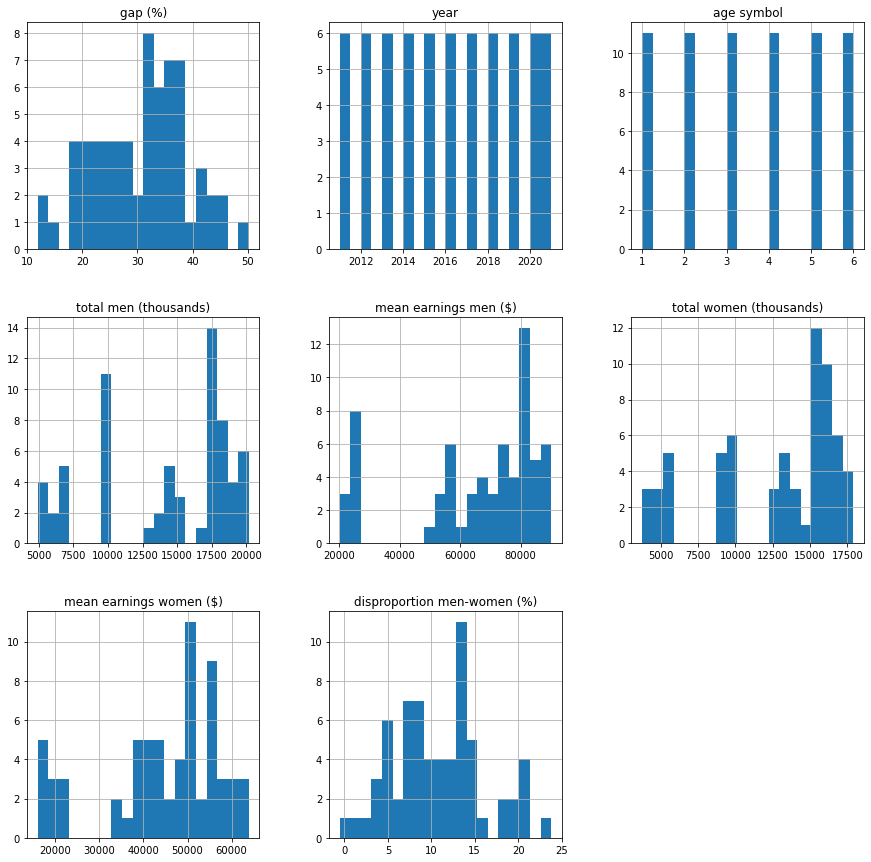

In [21]:
# Data distribution from Totals sheet
df_0.hist(figsize= (15,15), bins= 20)

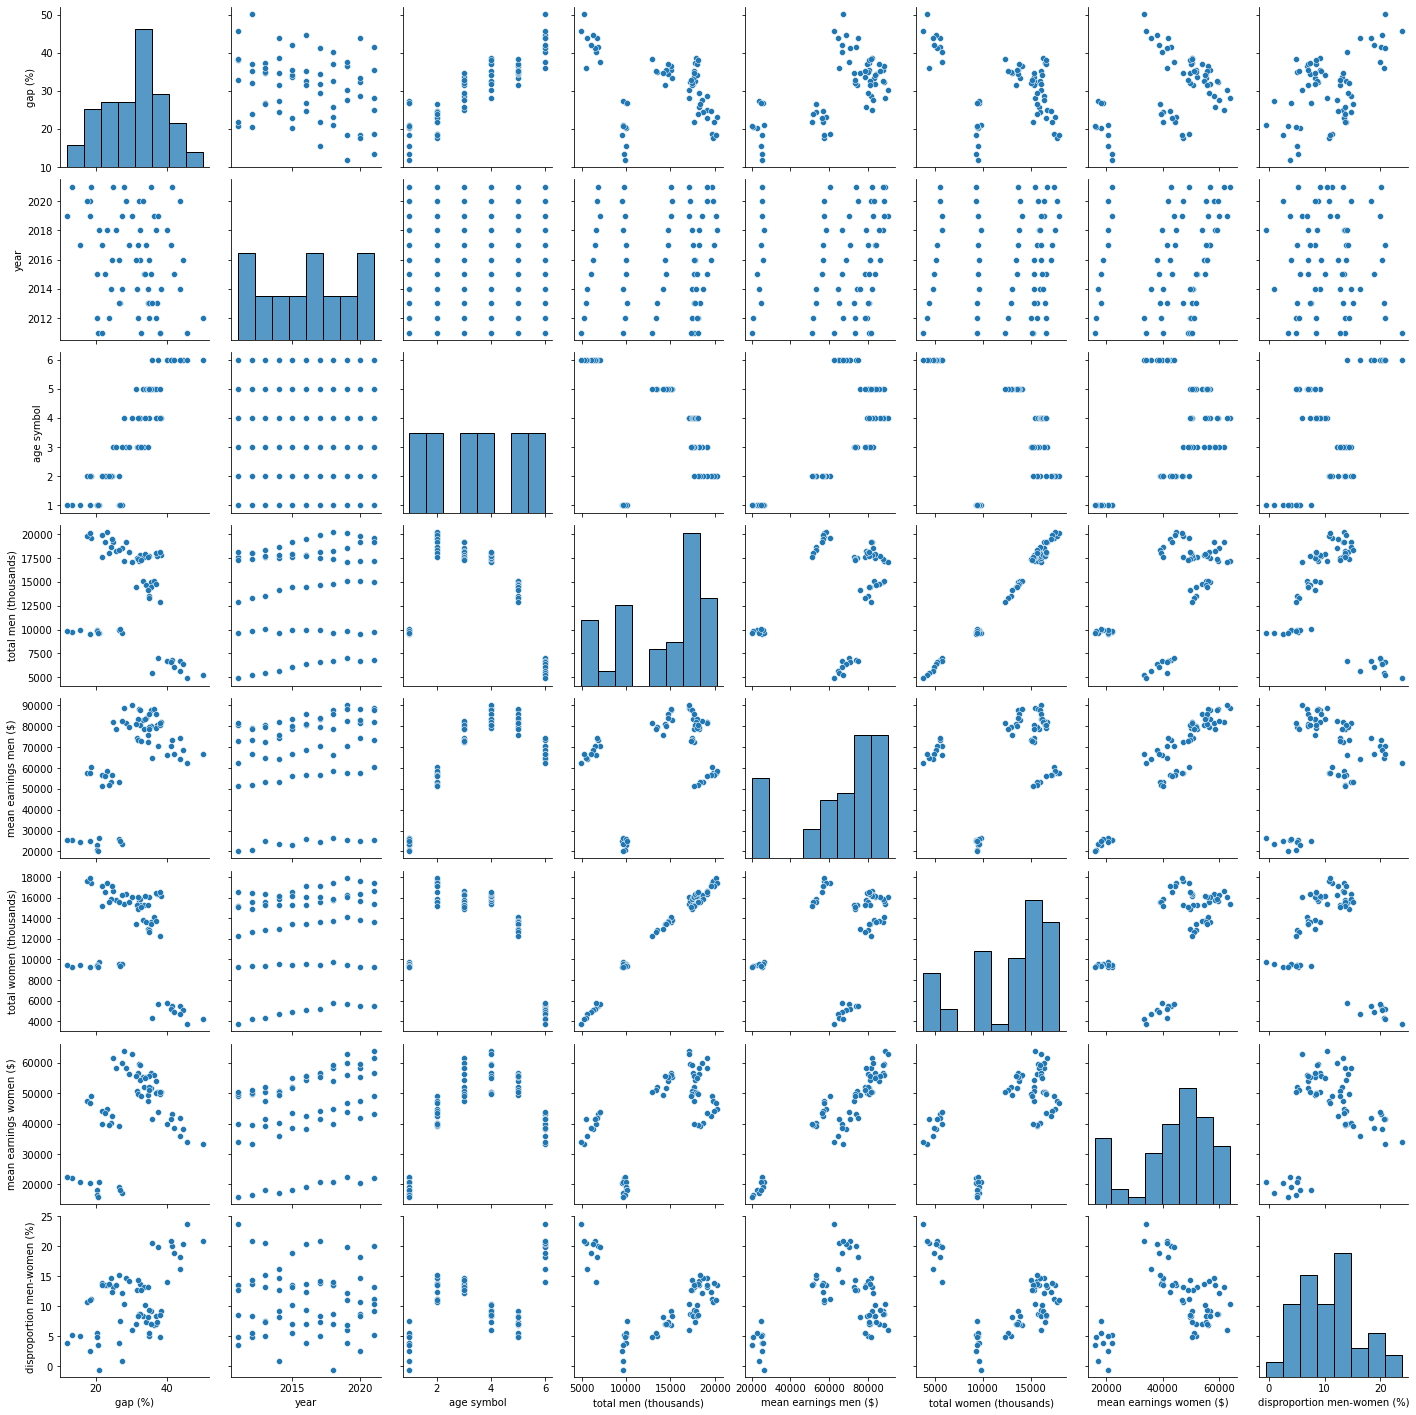

In [22]:
# Plotting dataset by pairs
sns.pairplot(df_0)

In [23]:
# Applying Correlation Matrix
df_0_corr = df_0.corr() 

<AxesSubplot:>

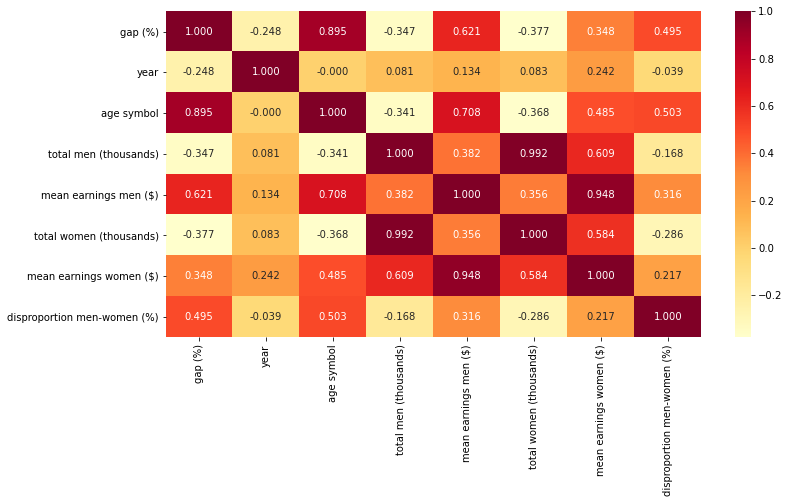

In [24]:
# Plotting correlation
plt.figure(figsize = (12,6))
sns.heatmap(df_0_corr, cmap = 'YlOrRd', fmt='.3f', annot = True)

<AxesSubplot:xlabel='year', ylabel='gap (%)'>

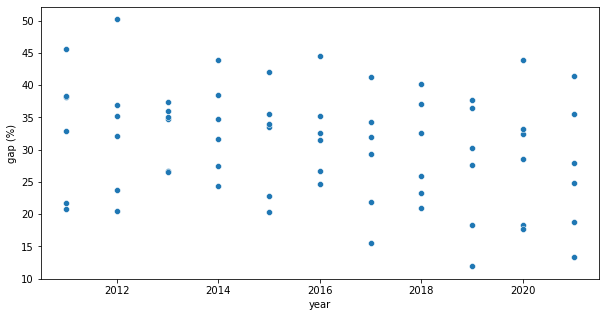

In [25]:
plt.figure(figsize = (10,5))
sns.scatterplot(y = 'gap (%)', x = 'year', data = df_0)

<AxesSubplot:xlabel='year', ylabel='gap (%)'>

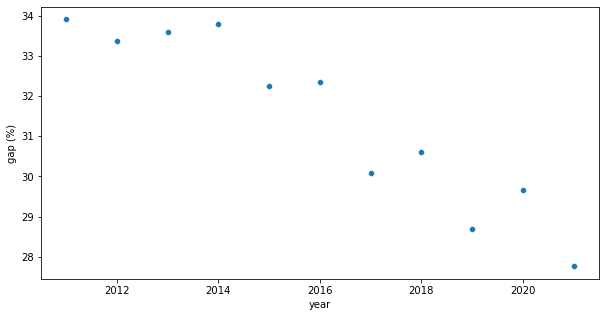

In [26]:
plt.figure(figsize = (10,5))
sns.scatterplot(y = 'gap (%)', x = 'year', data = df_0_total)

### Calculating Grade Percentile

In [30]:
# Calculating a new column called percentile from 'gap (%)'
df_0['percentile'] = df_0['gap (%)'].apply(lambda x: percentileofscore(df_0['gap (%)'], x))

Text(0.5, 1.0, 'Gap (%) Between the Gender - Percentiles')

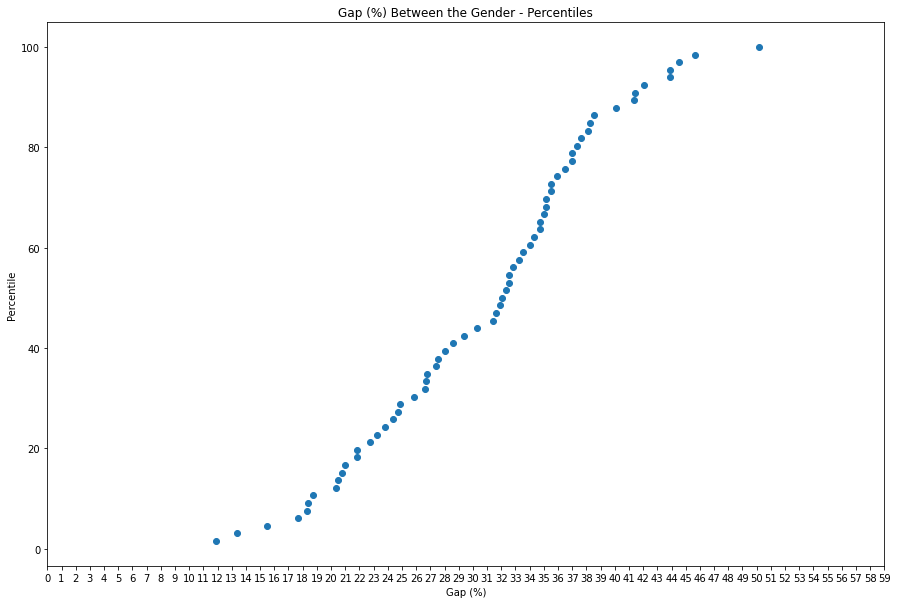

In [31]:
# Plotting percentiles
plt.figure(figsize = (15, 10))
plt.plot(df_0['gap (%)'], df_0['percentile'], 'o')

plt.xticks(range(0, 60, 1), range(0, 60, 1))
plt.xlabel('Gap (%)')
plt.ylabel('Percentile')
plt.title('Gap (%) Between the Gender - Percentiles')

In [32]:
print('50th percentile score:', np.min(df_0.loc[df_0['percentile'] == 50, 'gap (%)']))
print('Minimum Score needed for 90th percentile:', np.min(df_0.loc[df_0['percentile'] > 90, 'gap (%)']))
print('Maximum Score needed for 10th percentile:', np.max(df_0.loc[df_0['percentile'] < 10, 'gap (%)']))

50th percentile score: 32.06
Minimum Score needed for 90th percentile: 41.39
Maximum Score needed for 10th percentile: 18.35


### Feature Selection

In [33]:
# Calculating Correlation Coefficient
df_0.corr()['gap (%)'].sort_values()

total women (thousands)       -0.376927
total men (thousands)         -0.347268
year                          -0.248087
mean earnings women ($)        0.348348
disproportion men-women (%)    0.494539
mean earnings men ($)          0.620662
age symbol                     0.894545
percentile                     0.984476
gap (%)                        1.000000
Name: gap (%), dtype: float64

### Modeling

#### Separate features and target variables

In [35]:
# Keeping all variables in features to see more patterns
features = df_0
print(features.shape)

# The last column is considered as the dependent variable
target = df_0['gap (%)']
print(target.shape)

(66, 9)
(66,)


#### Train, Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1234)

print("Shape of Train dataset:      {}" .format(X_train.shape))
print("Total number of train target:  {}" .format(y_train.shape[0]))
print("Shape of Test dataset:       {}" .format(X_test.shape))
print("Total number of test target:   {}" .format(y_test.shape[0]))

Shape of Train dataset:      (52, 9)
Total number of train target:  52
Shape of Test dataset:       (14, 9)
Total number of test target:   14


#### Calculate Metrics

In [40]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

#### Grade Percentiles for gap (%)

In [43]:
# Create relation to 10th percentile of the target
X_plot = X_train.copy()
X_plot['relation_10thpercentile'] = (X_plot['gap (%)'] <= 18.35)
X_plot['relation_10thpercentile'] = X_plot['relation_10thpercentile'].replace({True: 'below', False: 'above'})
X_plot = X_plot.drop(columns= 'gap (%)')

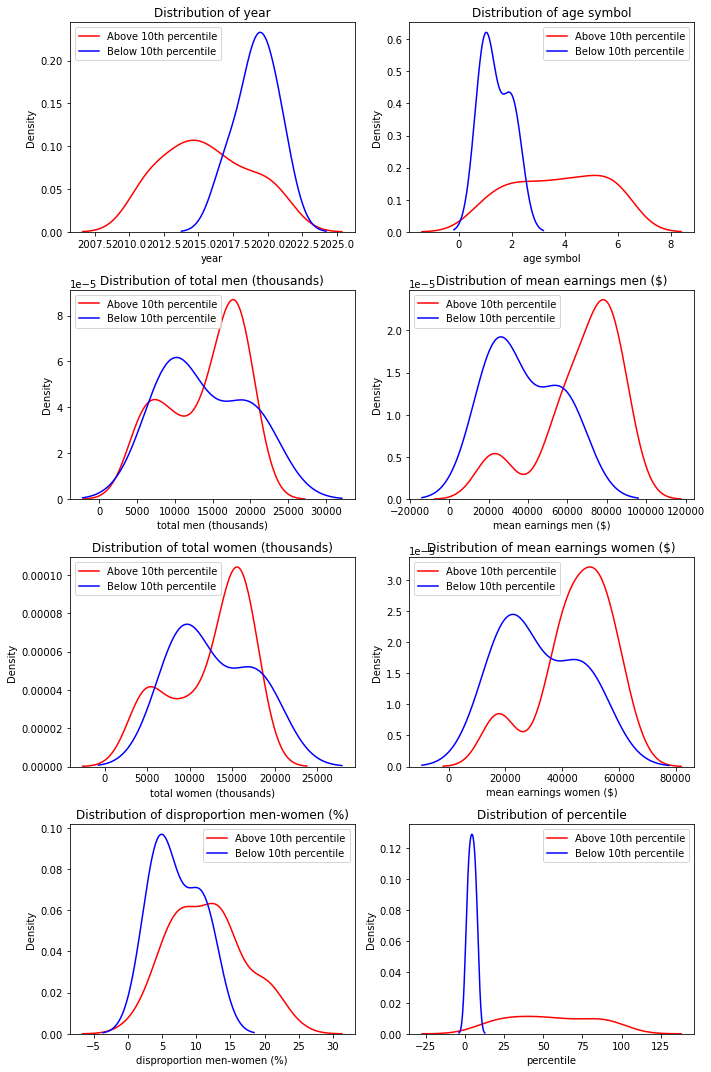

In [44]:
# Plotting the distribution of each feature by the relation 10th percentile
plt.figure(figsize=(10, 15))

for i, col in enumerate(X_plot.columns[:-1]):
    plt.subplot(4, 2, i + 1)
    subset_above = X_plot[X_plot['relation_10thpercentile'] == 'above']
    subset_below = X_plot[X_plot['relation_10thpercentile'] == 'below']
    sns.kdeplot(subset_above[col], label = 'Above 10th percentile', color = 'red')
    sns.kdeplot(subset_below[col], label = 'Below 10th percentile', color = 'blue')
    plt.legend(); plt.title('Distribution of %s' % col)
    
plt.tight_layout()

#### Baseline Metrics

In [45]:
# Considering baseline as the 10th percentile of the target, since we want to know the tendency of the lower gap
percentile_10th_pred= X_train['gap (%)'].quantile(0.1)
percentile_10th_preds= [percentile_10th_pred for _ in range(len(X_test))]
true= X_test['gap (%)']

In [46]:
# Displaying baseline metrics: 
p10th_b_mae, p10th_b_rmse = evaluate_predictions(percentile_10th_preds, true)
print('10th Percentile Baseline  MAE: {:.4f}'.format(p10th_b_mae))
print('10th Percentile Baseline RMSE: {:.4f}'.format(p10th_b_rmse))

10th Percentile Baseline  MAE: 12.7201
10th Percentile Baseline RMSE: 14.4141


### Machine Learning Models

In [47]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression', 'Random Forest', 'SVM', 'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='gap (%)')
    X_test = X_test.drop(columns='gap (%)')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model5 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.percentile(y_train, 10)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [48]:
results = evaluate(X_train, X_test, y_train, y_test)

In [49]:
results
# Here we see the best ML Models are:
    # 1. Random Forest
    # 2. ElasticNet Regression
    # 3. LR
    # 4. Gradient Boosted
    # 5. SVM

,mae,rmse
Linear Regression,0.63439,0.801994
ElasticNet Regression,0.576731,0.799712
Random Forest,0.288471,0.396173
SVM,5.672714,6.930378
Gradient Boosted,0.67096,0.855238
Baseline,12.720143,14.414141


In [50]:
print('The Random Forest is {:0.2f}% better than the Baseline.'.format(
    (100 * abs(results.loc['Random Forest', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Random Forest is 97.73% better than the Baseline.


### Visual Comparison of Models

In [51]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

from IPython.core.pylabtools import figsize

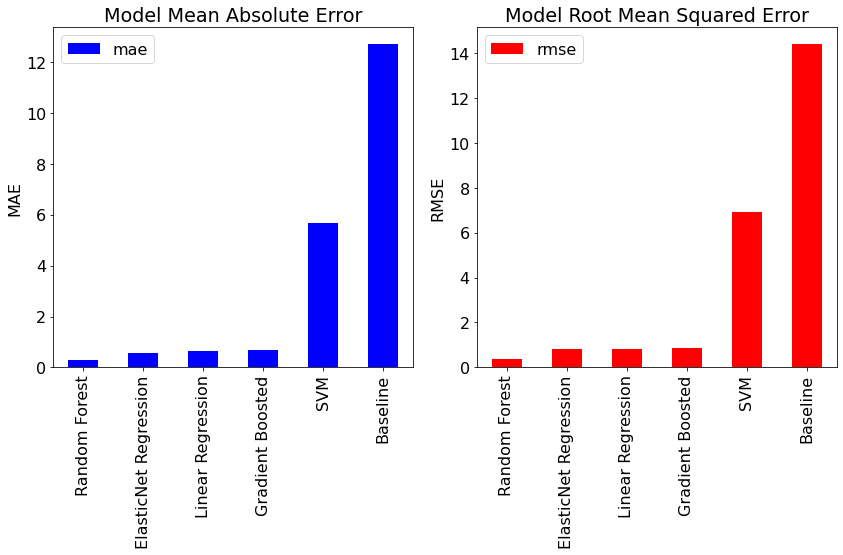

In [52]:
figsize(12, 8)

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

### Evaluating Random Forest Results

In [53]:
model3 = RandomForestRegressor(n_estimators=50, random_state= 1234)
model3.fit(X_train, y_train)

# Predictions of gap (%)
y_pred_3 = model3.predict(X_test)
print(y_pred_3)

[36.443  35.2422 24.322  27.575  17.074  35.3884 43.6488 26.1142 35.4802
 32.5376 34.5964 32.312  37.725  20.6594]


In [54]:
# Checking difference between the actual and predicted values
df_diff= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3})
df_diff

,Actual,Predicted
26,37.00,36.4430
46,35.17,35.2422
79,23.80,24.3220
10,28.62,27.5750
8,18.35,17.0740
82,35.13,35.3884
48,44.56,43.6488
24,25.86,26.1142
5,35.51,35.4802
25,32.55,32.5376


### Plotting Random Forest Results

Text(0.5, 1.0, 'Results of actual test target vs predicted test - RANDOM FOREST')

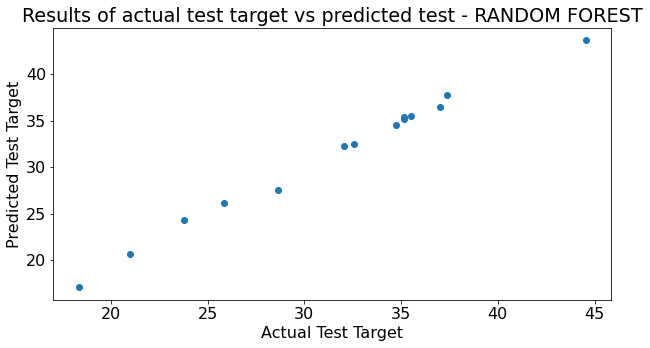

In [55]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_pred_3)
plt.xlabel("Actual Test Target")
plt.ylabel("Predicted Test Target")
plt.title("Results of actual test target vs predicted test - RANDOM FOREST")

### Accuarcy of the prediction

In [56]:
# Calculate the absolute errors
errors = abs(y_pred_3 - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.41 %.


### Plotting distribution of Actual vs. Predicted Values

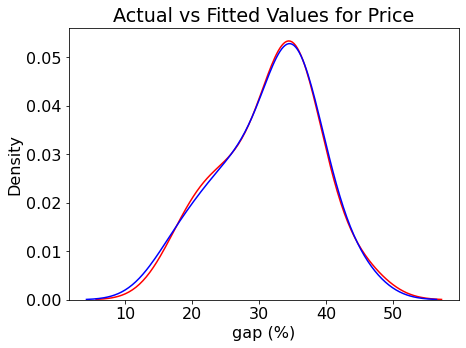

In [57]:
plt.figure(figsize=(7, 5))

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_3, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()